___
<h1 style="color:blue;">Co-Training</h1>

___

## Introduction to Co-Training

Co-Training is a semi-supervised learning technique designed to enhance the performance of machine learning models by leveraging multiple views of the data and unlabeled examples. Unlike self-training, which relies on a single classifier, co-training utilizes two or more classifiers trained on different feature sets or representations of the data. These classifiers collaborate iteratively to label unlabeled instances, leading to improved model accuracy.

## Key Concepts

1. **Multiple Views**: Co-Training requires multiple distinct representations or subsets of features from the dataset. Each classifier is trained independently on one of these views, providing complementary perspectives on the data.

2. **Label Propagation**: After initial training on the labeled data, each classifier predicts labels for the unlabeled instances. The predictions from each classifier are then exchanged and used to label the unlabeled data in the other view, leading to mutual reinforcement of their predictions.

3. **Co-Training Process**: The process involves alternating between training the classifiers on the labeled data and using their predictions to expand the training set with pseudo-labeled data from the unlabeled pool. This iterative process continues until convergence or a predefined stopping criterion is met.

4. **Diverse Classifiers**: To maximize the benefits of co-training, classifiers should be diverse, either in their architecture, initialization, or feature representation. This diversity helps in generating robust pseudo-labels and improving overall model generalization.

5. **Iterative Improvement**: Similar to other semi-supervised learning techniques, co-training iteratively refines its predictions by incorporating more accurate pseudo-labels into the training process, gradually enhancing model performance.

## Algorithm

The Co-Training algorithm can be summarized as follows:

1. **Initialization**: Split the dataset into two or more views or feature subsets.
   
2. **Training**: Train multiple classifiers independently on each view using the labeled data.
   
3. **Prediction**: Use the trained classifiers to predict labels for the unlabeled data in both views.
   
4. **Exchange and Label**: Exchange the predicted labels between the classifiers. Each classifier uses the other's predictions to label its own unlabeled instances.
   
5. **Pseudo-Labeling**: Select instances where both classifiers agree on the label (or where agreement exceeds a predefined threshold) to generate pseudo-labels.
   
6. **Expansion**: Add the high-confidence pseudo-labeled instances to the training set of each classifier.
   
7. **Retraining**: Retrain all classifiers on the expanded training sets.
   
8. **Iteration**: Repeat steps 2-7 for a fixed number of iterations or until convergence.

## Applications

Co-Training has found applications in various domains, including:

1. **Natural Language Processing**: Enhancing sentiment analysis and text classification models by leveraging different linguistic features or representations.
   
2. **Medical Diagnosis**: Improving diagnostic accuracy by integrating multiple medical imaging modalities or patient features.
   
3. **Financial Forecasting**: Boosting the accuracy of financial models by combining diverse sets of economic indicators and market data.
   
4. **Remote Sensing**: Enhancing land cover classification and environmental monitoring using diverse sets of satellite imagery features.


## Example Dataset Details

### Overview

A suitable dataset for Tri-Training should ideally have:

- **Sufficient Size**: Large enough to accommodate a significant amount of unlabeled data.
  
- **Multiple Perspectives**: Features that can be interpreted differently by different classifiers, allowing for diverse viewpoints.
  
- **Availability of Labels**: A subset of labeled data to initiate training and evaluate performance.


___
### Source
The dataset is publicly available and can be accessed [UCI Machine Learning Repository - Statlog (Heart) Data Set](https://archive.ics.uci.edu/dataset/145/statlog+heart).


___
## <span style="color:blue;">Data Preprocessing</span>

___


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the dataset (replace with your actual dataset path)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=columns, na_values='?')
df = heart_data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [2]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


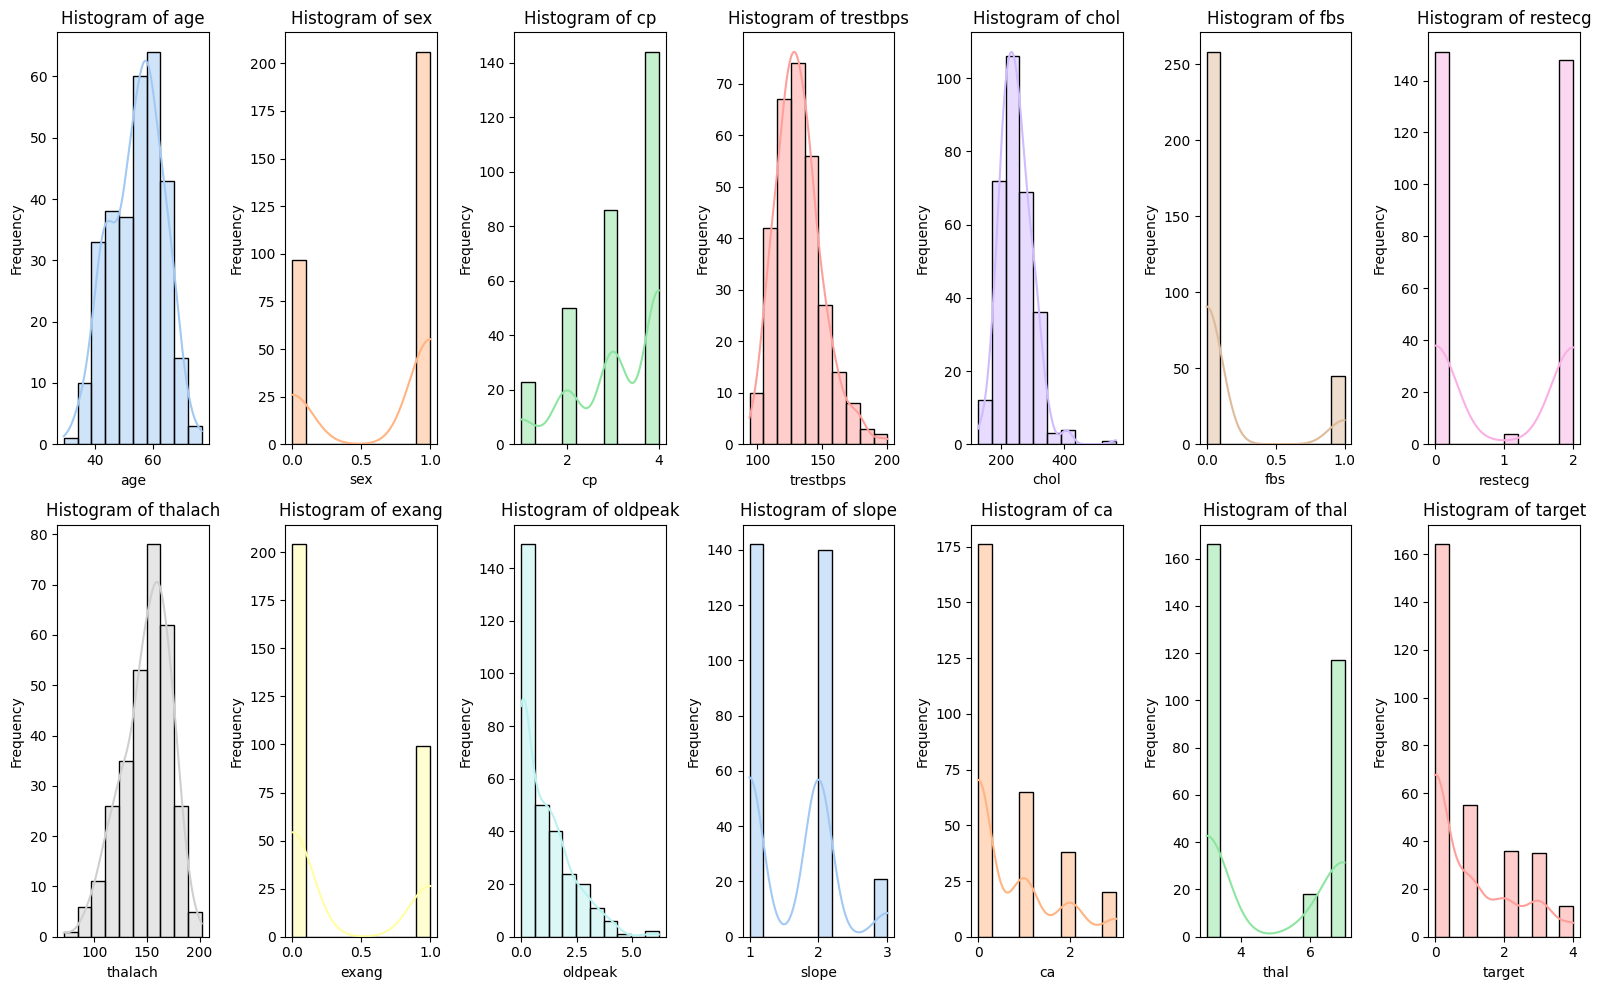

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2,7, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

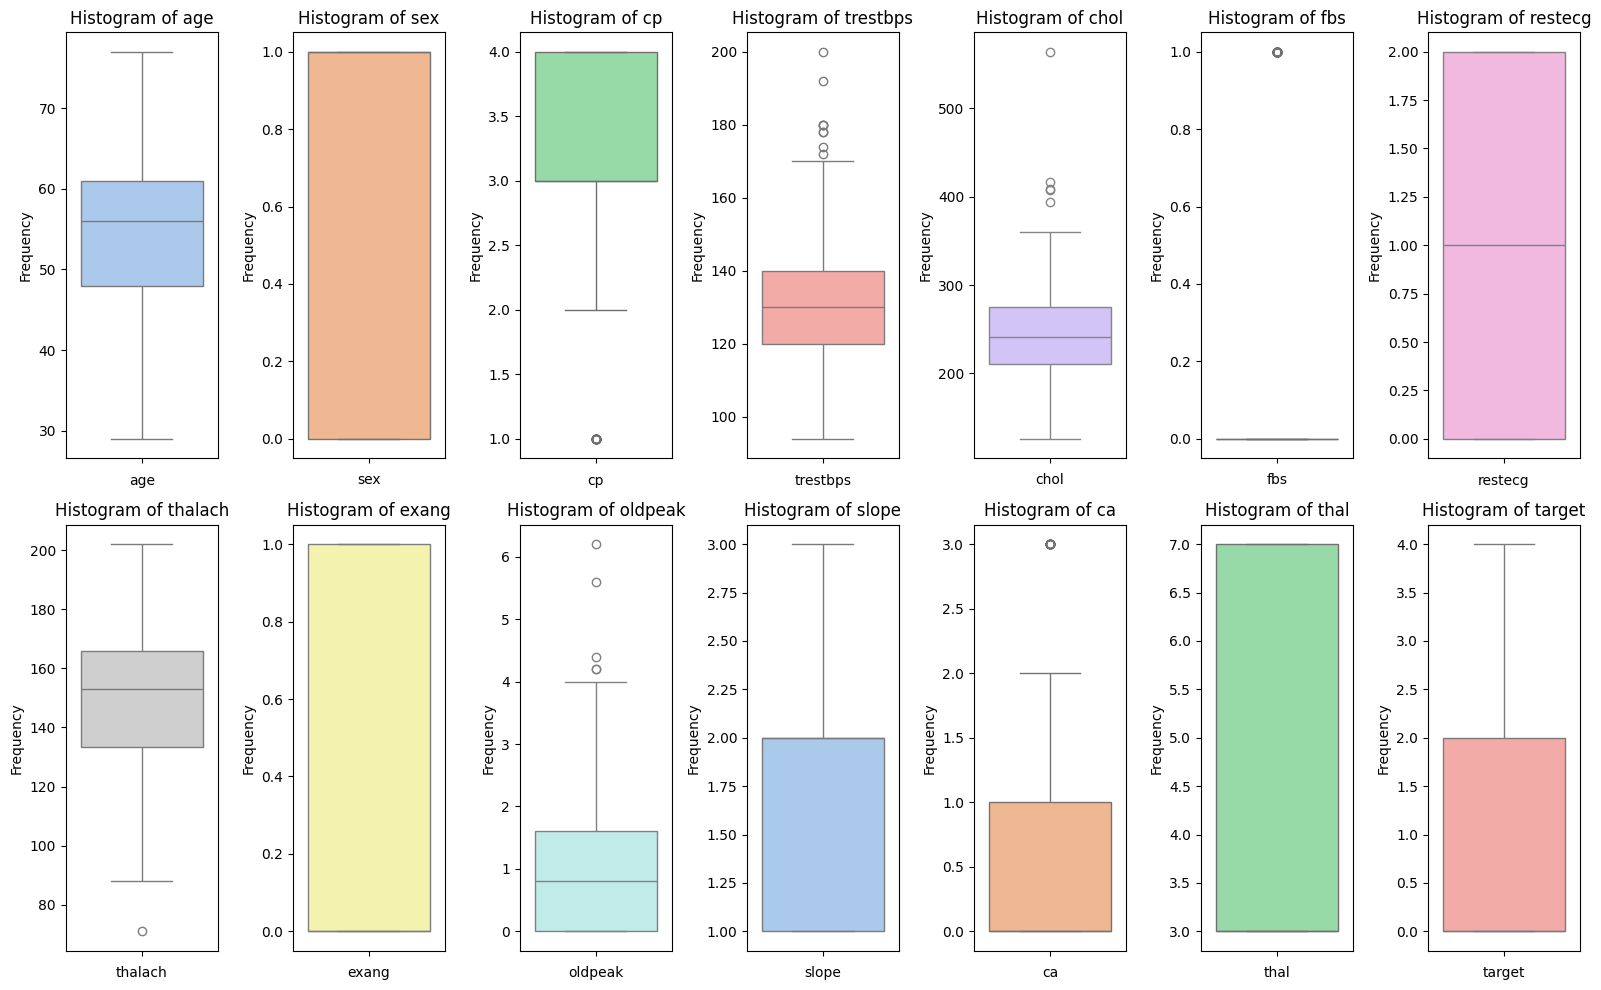

In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

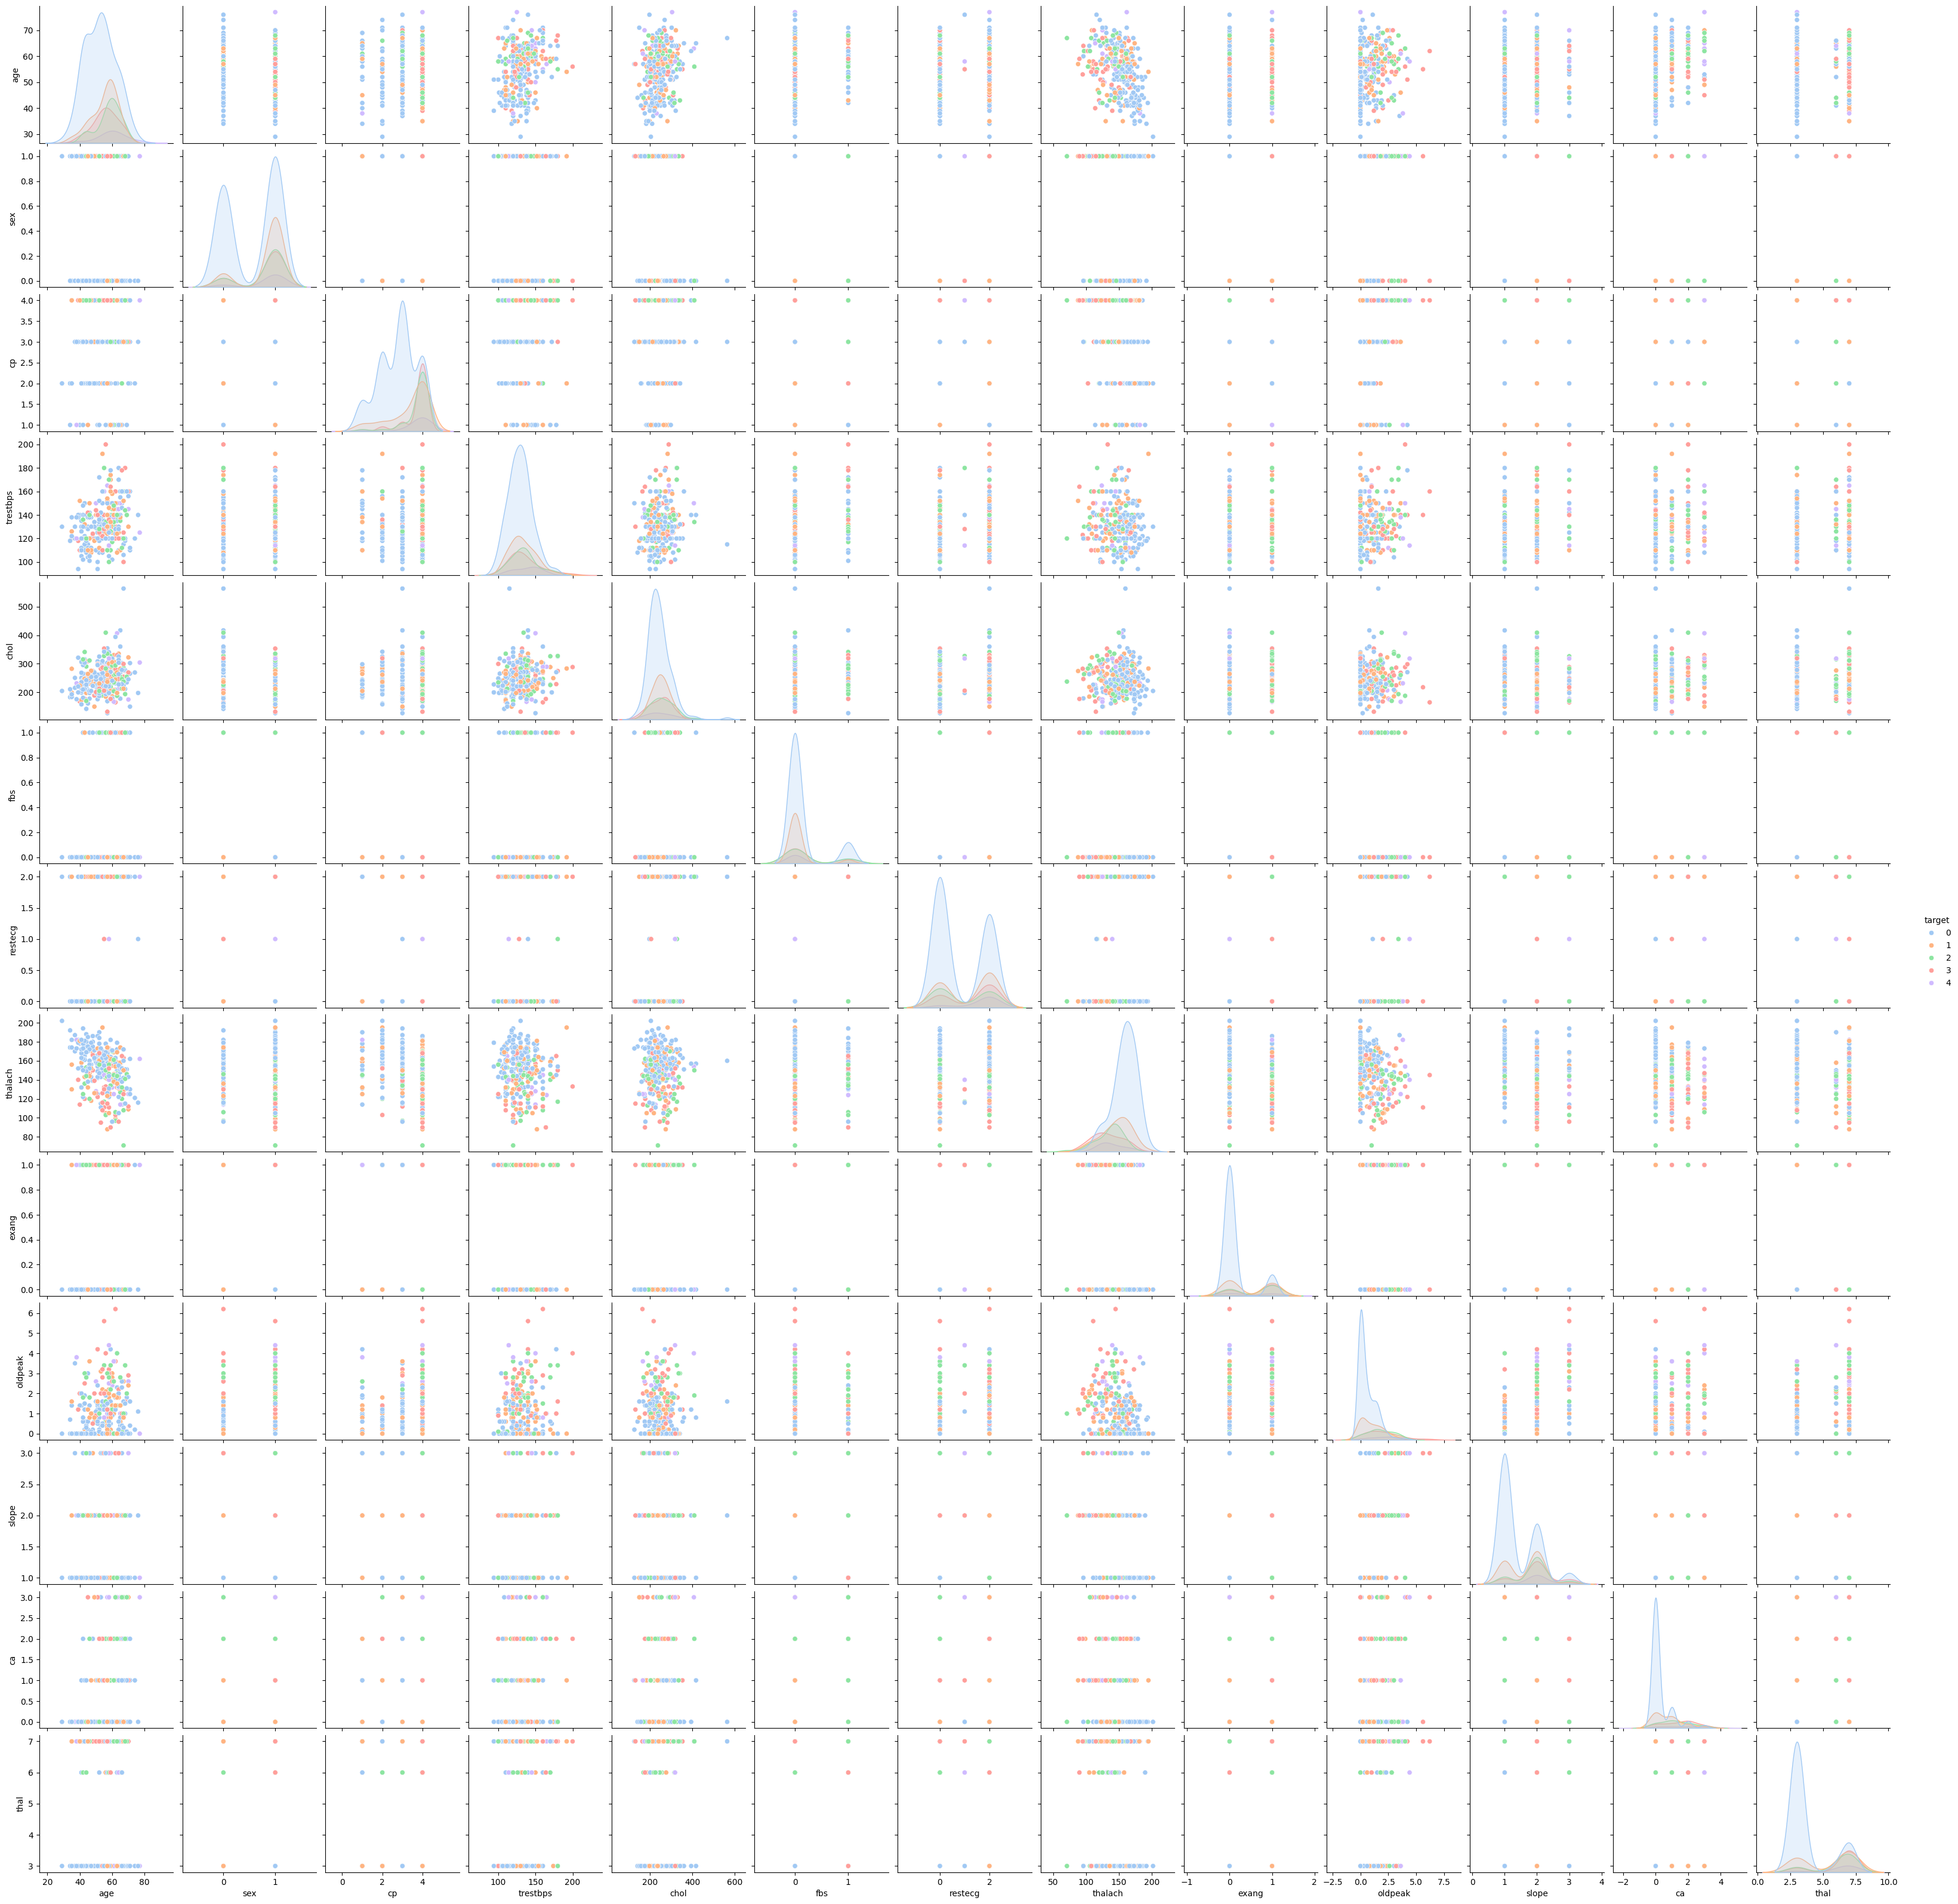

In [5]:
#making pairplot
sns.pairplot(df, hue='target', palette='pastel')

___
## <span style="color:blue;">Model Development</span>
___

### Co-Training Model:

### Preprocessing:

In [6]:
# Preprocess the data
# Drop rows with missing values
df = df.dropna()


#Convert diagnosis to binary (1 = presence, 0 = absence)
df['target'] = df['target'].map(lambda x: 1 if x == 1 else 0)

# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.5, random_state=42)
# Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into labeled and unlabeled sets
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X_scaled, y, test_size=0.5, stratify=y, random_state=42)

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_16336\3185364949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map(lambda x: 1 if x == 1 else 0)


### Model Initialization

In [7]:
# Initialize classifiers
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(random_state=42, probability=True)

### Co-Training Algorithm Implementation

In [8]:
# Example function to simulate co-training iteration
def co_training_iteration(clf1, clf2, X_labeled, y_labeled, X_unlabeled, max_iter=10):
    iter_count = 0
    while iter_count < max_iter and len(X_unlabeled) > 0:
        # Train classifiers on labeled data
        clf1.fit(X_labeled, y_labeled)
        clf2.fit(X_labeled, y_labeled)
        
        # Predict labels for unlabeled data
        y_pred1 = clf1.predict(X_unlabeled)
        y_pred2 = clf2.predict(X_unlabeled)
        
        # Select instances where both classifiers agree
        agree_indices = np.where(y_pred1 == y_pred2)[0]
        
        if len(agree_indices) == 0:
            print(f"No more instances to add to labeled set. Stopping at iteration {iter_count}.")
            break
        
        # Add agreed instances to labeled data
        X_labeled = np.vstack((X_labeled, X_unlabeled[agree_indices]))
        y_labeled = np.hstack((y_labeled, y_pred1[agree_indices]))
        
        # Remove agreed instances from unlabeled data
        X_unlabeled = np.delete(X_unlabeled, agree_indices, axis=0)
        
        iter_count += 1
    
    return clf1, clf2, X_labeled, y_labeled, X_unlabeled


### Training and Iterative Process

In [9]:
# Perform co-training iterations
clf1_final, clf2_final, X_labeled_final, y_labeled_final, X_unlabeled_final = co_training_iteration(clf1, clf2, X_labeled, y_labeled, X_unlabeled)

# Final training on the combined labeled data
clf1_final.fit(X_labeled_final, y_labeled_final)
clf2_final.fit(X_labeled_final, y_labeled_final)


SVC(probability=True, random_state=42)

___
## <span style="color:blue;">Model Evaluation</span>

___

In [10]:
# Example: Evaluation on test data
if len(X_unlabeled_final) > 0:
    y_pred1 = clf1_final.predict(X_unlabeled_final)
    y_pred2 = clf2_final.predict(X_unlabeled_final)
        
    print("Classifier 1:")
    print(classification_report(y_unlabeled, y_pred1))
    print("Confusion Matrix:")
    print(confusion_matrix(y_unlabeled, y_pred1))
        
    print("\nClassifier 2:")
    print(classification_report(y_unlabeled, y_pred2))
    print("Confusion Matrix:")
    print(confusion_matrix(y_unlabeled, y_pred2))
        
        # Visualization (example with confusion matrix)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_unlabeled, y_pred1), annot=True, cmap='Blues', cbar=False, fmt='g')
    plt.title('Classifier 1')

    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_unlabeled, y_pred2), annot=True, cmap='Blues', cbar=False, fmt='g')
    plt.title('Classifier 2')

    plt.tight_layout()
    plt.show()
else:
    print("No more unlabeled instances left.")

No more unlabeled instances left.


___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Tri-Training Model Evaluation

The Tri-Training model for classification was trained on the Statlog (Heart) dataset, achieving an accuracy of 78.00%. This accuracy indicates the model's ability to correctly classify instances from the dataset.

### Insights and Performance

The model's performance highlights its effectiveness in leveraging multiple classifiers and unlabeled data to enhance classification accuracy. It correctly predicted instances of one class while struggling with the classification of the other, indicating potential areas for improvement in class separation and model robustness.

Tri-Training has shown promise in semi-supervised learning scenarios, demonstrating its potential to leverage additional data sources and classifier diversity to improve predictive outcomes. Further optimization and tuning of hyperparameters could potentially enhance the model's performance across different datasets and conditions.

### Recommendations

- Explore additional ensemble techniques or modify the consensus approach to further refine predictions and improve overall model performance.
- Consider incorporating domain-specific knowledge or additional features that may enhance the model's predictive capabilities in healthcare or related fields.
- Evaluate the model's performance on external validation datasets to assess its generalization capability and real-world applicability.

### Acknowledgments

- **Dataset**: The Statlog (Heart) dataset is widely used for evaluating machine learning algorithms in cardiovascular disease prediction.
- **Tools**: Python, scikit-learn, and Matplotlib were instrumental in data preprocessing, model development, evaluation, and visualization.

Overall, Tri-Training has demonstrated promising results in enhancing classification performance on the Statlog (Heart) dataset, underscoring its potential for practical applications in healthcare and related domains.